In [ ]:
from keras.layers import BatchNormalization


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

print("Loaded all libraries")


Loaded all libraries


In [ ]:
fpath = "/content/drive/MyDrive/archive/Original Dataset"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['Downy Mildew', 'Black Rot', 'Bacterial spot rot', 'No disease'] 

No. of categories =  4


In [ ]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img_array = Image.fromarray(img, 'RGB')

            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))

            img_lst.append(np.array(resized_img))

            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  656 
No. of labels loaded =  656
<class 'list'> <class 'list'>


In [ ]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (656, 227, 227, 3) 
Labels shape =  (656,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


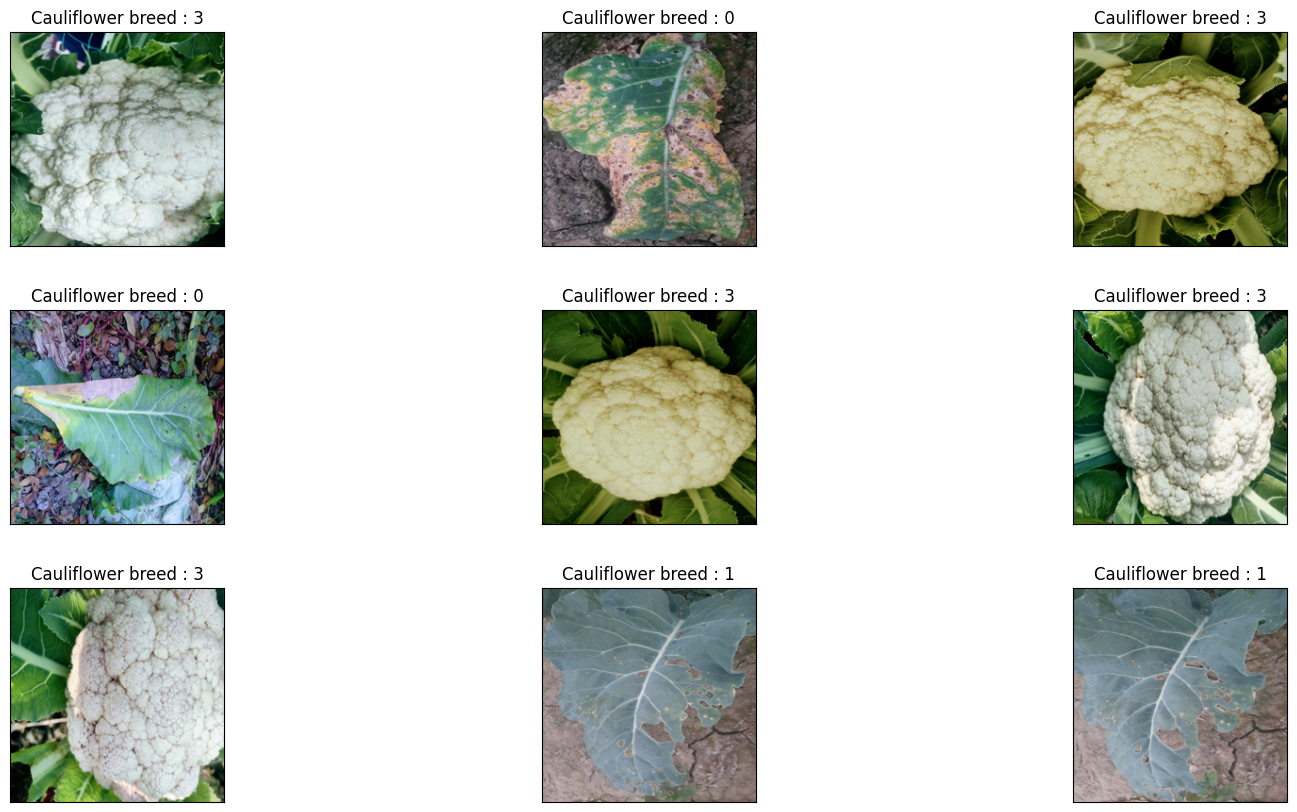

In [ ]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])

        plt.title('Cauliflower breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_rand_images(images, labels)

In [ ]:
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238

In [ ]:
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (656, 227, 227, 3) 
Labels shape after shuffling =  (656,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (656, 227, 227, 3)


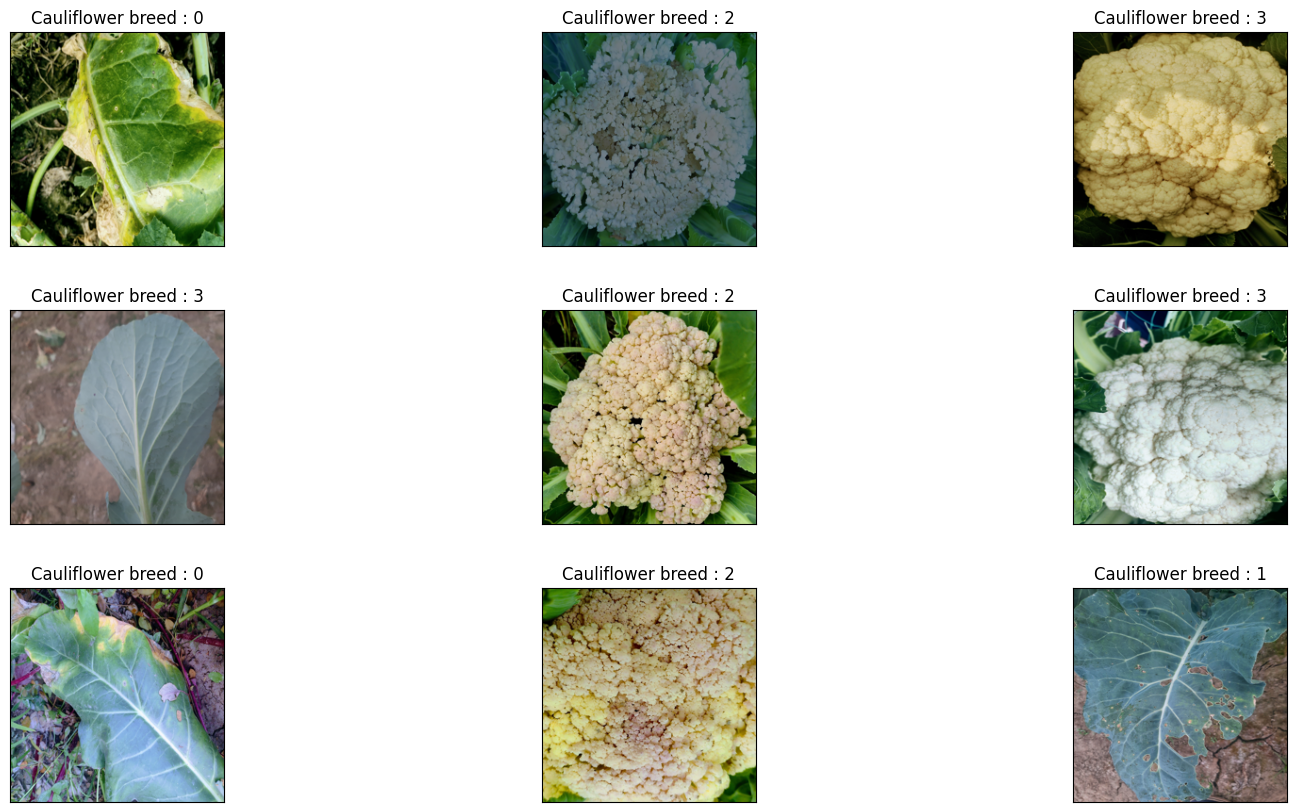

In [ ]:
display_rand_images(images, labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (524, 227, 227, 3)
y_train shape =  (524,)

x_test shape =  (132, 227, 227, 3)
y_test shape =  (132,)


In [ ]:
display_rand_images(x_train, y_train)

In [ ]:
model=Sequential()

model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

model.add(Dense(20,activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 11, 11, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       4,097,0

 Total params: 28,883,132 (110.18 MB)

 Trainable params: 28,863,532 (110.11 MB)

 Non-trainable params: 19,600 (76.56 KB)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
%%time
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.3194 - loss: 3.3162
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6318 - loss: 1.6744
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.6622 - loss: 1.2461
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.6804 - loss: 1.2033
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7345 - loss: 0.8851
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.6588 - loss: 1.2997
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.7742 - loss: 0.7406
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7622 - loss: 0.8373
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7590 - loss: 0.6679
Epoch 10/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7839 - loss: 0.6469
Epoch 11/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7902 - loss: 0.6372
Epoch 12/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.8092 - lo

In [ ]:
history.history

{'accuracy': [0.4293893277645111,
  0.6488549709320068,
  0.6583969593048096,
  0.6889312863349915,
  0.7290076613426208,
  0.7099236845970154,
  0.7652671933174133,
  0.7423664331436157,
  0.75,
  0.7843511700630188,
  0.7862595319747925,
  0.8034350872039795,
  0.8339694738388062,
  0.8072519302368164,
  0.8339694738388062,
  0.8129770755767822,
  0.8511450290679932,
  0.864503800868988,
  0.8778625726699829,
  0.8664122223854065,
  0.8721374273300171,
  0.8912213444709778,
  0.8969465494155884,
  0.8969465494155884,
  0.9255725145339966,
  0.8740457892417908,
  0.8797709941864014,
  0.902671754360199,
  0.9332060813903809,
  0.9217557311058044],
 'loss': [2.9942562580108643,
  1.484143614768982,
  1.2940149307250977,
  1.1376216411590576,
  0.8991843461990356,
  1.0655206441879272,
  0.7326920628547668,
  0.9371263384819031,
  0.6995623111724854,
  0.6835340857505798,
  0.6703650951385498,
  0.604956328868866,
  0.4894014298915863,
  0.5350947976112366,
  0.4852120280265808,
  0.578

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.4530 - loss: 4.2436
3.93095064163208 0.5075757503509521


In [ ]:
pred = model.predict(x_test)

pred.shape

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 614ms/step


(132, 20)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(x_test)
y_predi=np.argmax(y_pred, axis=1)
# y_testi=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test , y_predi)

import seaborn as sns
sns.heatmap(cm , cmap="summer" , annot=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 513ms/step


<Axes: >

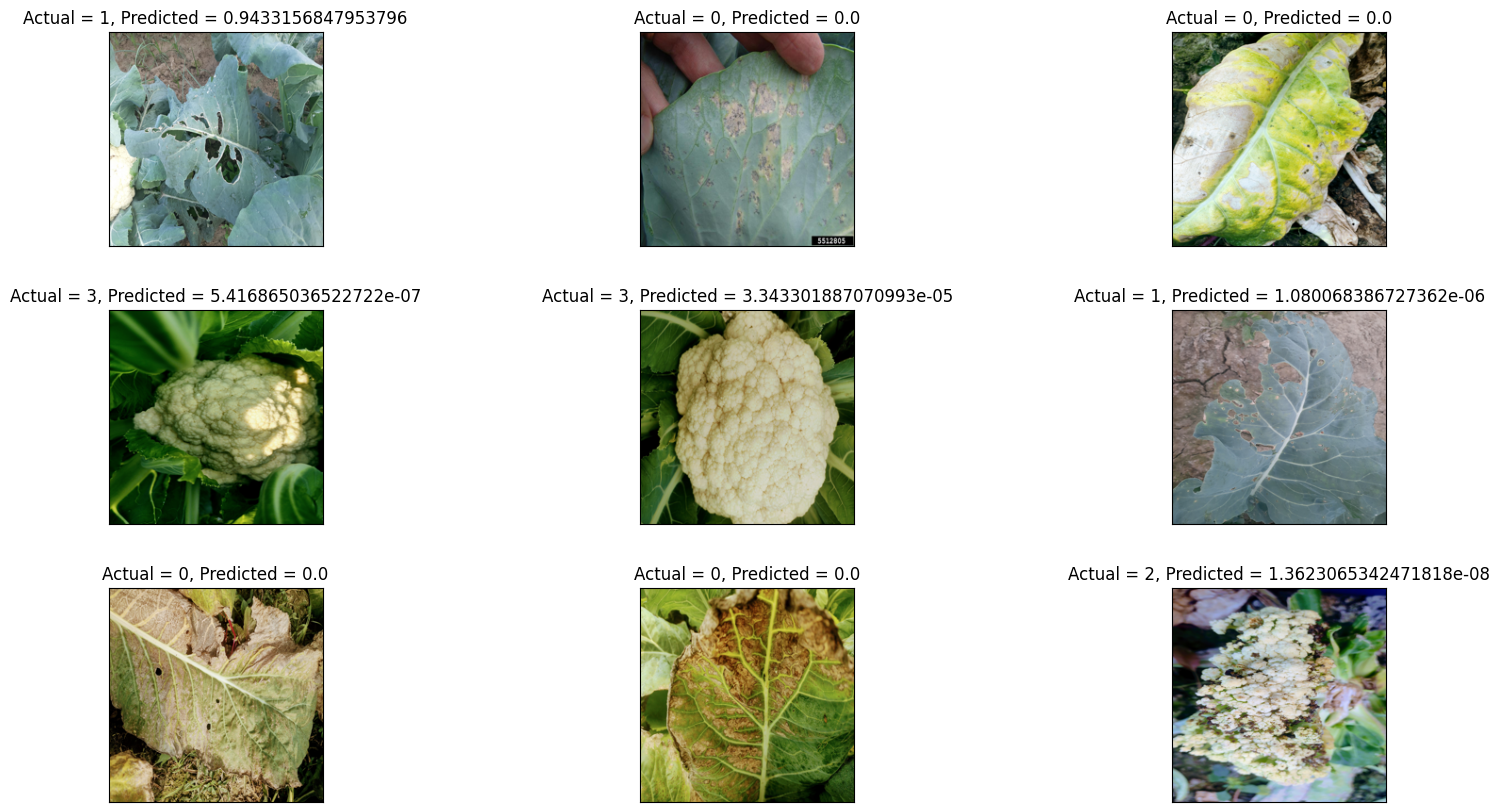

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()